In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
A = pd.read_csv('../data/FEATURES.csv')
A.head()

,File,IndexStart,IndexEnd,StepsL,StepsR,Ts,SegLen,TimeLen,StepFreqL,StepFreqR,...,EnergyBand_3_15_54,EnergyBand_15_29_54,EnergyBand_3_15_55,EnergyBand_15_29_55,EnergyBand_3_15_56,EnergyBand_15_29_56,EnergyBand_3_15_57,EnergyBand_15_29_57,EnergyBand_3_15_58,EnergyBand_15_29_58
0,N-01-1-Char00part2seg-9_sub_0.csv,58127.0,59961.0,12.0,13.0,0.008,1835.0,14.680,0.817439,0.885559,...,NaN,NaN,0.375840,0.068284,NaN,NaN,NaN,NaN,NaN,NaN
1,A-615829-Char00part1seg-4_sub_1.csv,37215.0,37836.0,3.0,2.0,0.008,622.0,4.976,0.602894,0.401929,...,NaN,NaN,0.419328,0.077711,NaN,NaN,NaN,NaN,NaN,NaN
2,N-25031996-Char00part3seg-2_sub_0.csv,24585.0,26738.0,14.0,14.0,0.008,2154.0,17.232,0.812442,0.812442,...,NaN,NaN,0.419684,0.087584,NaN,NaN,NaN,NaN,NaN,NaN
3,A-766012-Char00part1seg-1_sub_5.csv,5114.0,6533.0,11.0,10.0,0.017,1420.0,24.140,0.455675,0.414250,...,0.379196,0.206181,0.432784,0.161571,0.429657,0.193923,0.429657,0.193923,0.429657,0.193923
4,N-740516-Char00part3seg-0_sub_0.csv,7316.0,8149.0,13.0,12.0,0.017,834.0,14.178,0.916914,0.846382,...,0.422536,0.116652,0.389778,0.103454,0.440059,0.094613,0.440059,0.094613,0.440059,0.094613


In [3]:
A.Type.value_counts()

N    212
A     99
Name: Type, dtype: int64

### Prepare matrix X with numbers and vector y of types

In [4]:
X = A.copy()
y = np.array(X.Type=='A').astype(int)
X.drop(columns={'Subject','Type','IndexStart','IndexEnd','Ts','SegLen','TimeLen','MaxDir','MinDir','MeanDir','StdDir','StepsL','StepsR'},inplace=True)
X.dropna(axis=1,inplace=True)
X.set_index('File',inplace=True)

In [5]:
X.head()

,StepFreqL,StepFreqR,EnergyBand_3_15_0,EnergyBand_15_29_0,EnergyBand_3_15_1,EnergyBand_15_29_1,EnergyBand_3_15_2,EnergyBand_15_29_2,EnergyBand_3_15_3,EnergyBand_15_29_3,...,EnergyBand_3_15_21,EnergyBand_15_29_21,EnergyBand_3_15_24,EnergyBand_15_29_24,EnergyBand_3_15_28,EnergyBand_15_29_28,EnergyBand_3_15_32,EnergyBand_15_29_32,EnergyBand_3_15_36,EnergyBand_15_29_36
File,,,,,,,,,,,,,,,,,,,,,
N-01-1-Char00part2seg-9_sub_0.csv,0.817439,0.885559,0.355221,0.189428,0.385146,0.245590,0.409115,0.240203,0.350486,0.180774,...,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673,0.380382,0.079673
A-615829-Char00part1seg-4_sub_1.csv,0.602894,0.401929,0.506192,0.085132,0.442695,0.127328,0.564822,0.144963,0.298850,0.230750,...,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516,0.337415,0.299516
N-25031996-Char00part3seg-2_sub_0.csv,0.812442,0.812442,0.533281,0.165664,0.504082,0.154384,0.464476,0.206254,0.311460,0.237982,...,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974,0.441981,0.098974
A-766012-Char00part1seg-1_sub_5.csv,0.455675,0.414250,0.592277,0.173642,0.538505,0.217750,0.524634,0.210781,0.439928,0.268985,...,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625,0.466998,0.159625
N-740516-Char00part3seg-0_sub_0.csv,0.916914,0.846382,0.480260,0.218803,0.499402,0.311756,0.452750,0.322480,0.380628,0.303668,...,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806,0.374677,0.094806


# ----------------------------  CLASSIFICATION  ----------------------------
### supervised learning

## [A] DATA SPLIT TO TRAIN AND TEST SET

#### BALANCING THE DATASET TO SAME AMOUNT OF SAMPLES
see this for documentation of SMOTE over-sampling:
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

In [6]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

Using TensorFlow backend.


In [7]:
X.shape

(311, 52)

In [8]:
sum(y==1)

99

In [9]:
X_resampled.shape

(424, 52)

In [10]:
sum(y_resampled==1)

212

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 0)

## [B] DATA PREPROCESSING: FEATURE SCALING

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## [C] CLASSIFICATION

# COMPARISON OF CLASSIFIERS

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score

from confusion_matrix_pretty_print import *

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

names = ["LogisticRegression","Nearest Neighbors","Linear SVM",
         "Poly SVM","RBF SVM","Naive Bayes", "Decision Tree",
         "Random Forest","Neural Net", "AdaBoost","QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    SVC(),
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()]

params = [{ 'penalty' : ['l1', 'l2'],         # LogReg
           'C' : np.logspace(-4, 4, 20),
           'solver' : ['liblinear']},
          {'n_neighbors' : np.arange(5,15,2), # k-NN
           'metric' : ['minkowski'],
           'p' : [2],
           'n_jobs': [-1]},
          {'C' : np.logspace(-4, 4, 20),      # Linear SVM
          'kernel' : ['linear'],
           'gamma' : ['scale'],
           'random_state' : [0]},
          {'C' : np.logspace(-4, 4, 20),      # Poly SVM
          'kernel' : ['poly'],
           'degree' : np.arange(1,5),
           'gamma' : ['scale'],
           'random_state' : [0]},
          {'C' : np.logspace(-4, 4, 20),      # RBF SVM
           'kernel' : ['rbf'],
           'gamma' : np.logspace(-4, 4, 20),
           'random_state' : [0]},
          {},                                 # Naive Bayes
          {'criterion' : ['gini', 'entropy'], # Decision tree
           'max_depth' : np.arange(1,20),
           'random_state' : [0]},   
          {'n_estimators' : list(range(1,21,10)),  # Random Forrest
           'max_features' : list(range(1,np.size(X,axis=1),5))},
          {'solver' : ['lbfgs', 'sgd', 'adam'],    # Neural net
           'max_iter' : [1000]},
          {'n_estimators' : list(range(1,21,10)), # AdaBoost
           'random_state' : [0]}, 
          {}] # QDA

### GRID SEARCH FOR ALL CLASSIFIERS

In [14]:
best_params = [None]*len(classifiers)
for i,c in enumerate(classifiers):    
    # Create grid search object

    clf = GridSearchCV(c,param_grid = params[i],cv=5,iid=True)

    # Fit on data

    best_clf = clf.fit(X_train, y_train)
    
    best_params[i] = clf.best_params_
    
    

In [15]:
best_params

[{'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'},
 {'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 5, 'p': 2},
 {'C': 0.0006951927961775605,
  'gamma': 'scale',
  'kernel': 'linear',
  'random_state': 0},
 {'C': 11.288378916846883,
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'poly',
  'random_state': 0},
 {'C': 0.615848211066026,
  'gamma': 0.03359818286283781,
  'kernel': 'rbf',
  'random_state': 0},
 {},
 {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0},
 {'max_features': 16, 'n_estimators': 11},
 {'max_iter': 1000, 'solver': 'lbfgs'},
 {'n_estimators': 11, 'random_state': 0},
 {}]

### REPEATED CROSS VALIDATION 

In [16]:
rep = 5
score = np.empty(len(classifiers))
scores = np.empty((len(classifiers),rep))
i=0
for name, clf, param in zip(names, classifiers, best_params):
    clf.set_params(**param)
    clf.fit(X_train, y_train)
    score[i] = clf.score(X_test, y_test)
    scores[i,:] = cross_val_score(clf, X_resampled, y_resampled, cv=rep)
    i+=1

Text(0.5, 1.0, 'ACCURACY')

<Figure size 864x432 with 0 Axes>

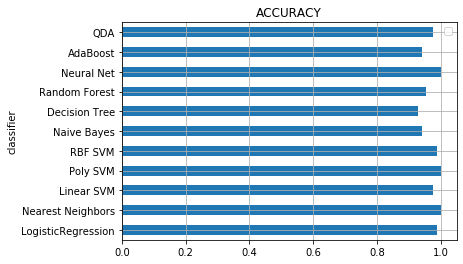

In [17]:
df = pd.DataFrame({'classifier':names, 'accuracy':score})
plt.figure(figsize=(12,6))
ax = df.plot.barh(x='classifier', y='accuracy', rot=0)
ax.legend([])
ax.grid()
ax.set_title('ACCURACY')

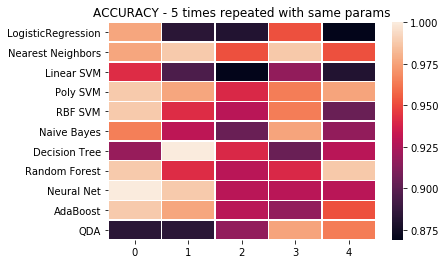

In [18]:
sns.heatmap(scores,yticklabels=names,linewidths=0.5)
plt.yticks(rotation=0) 
plt.title('ACCURACY - 5 times repeated with same params')
plt.show()


### STRATIFIED CROSS VALIDATION
see visualization how stratified cross validation works over here:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [19]:
from sklearn.model_selection import StratifiedKFold

splits=9
score = np.empty((splits,len(classifiers)))


skf = StratifiedKFold(n_splits=splits)

split = 0
for train, test in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train], X_resampled[test]
    y_train, y_test = y_resampled[train], y_resampled[test]
    i=0
    for name, clf, param in zip(names, classifiers, best_params):
        clf.set_params(**param)
        clf.fit(X_train, y_train)
        score[split,i] = clf.score(X_test, y_test)
        i+=1
    split+=1

Text(0.5, 1, 'Accuracy')

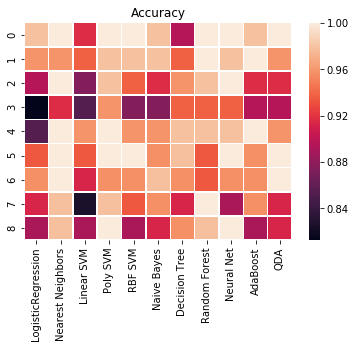

In [20]:
sns.heatmap(score,xticklabels=names,linewidths=0.5)
plt.title('Accuracy')

### LEAVE-ONE-SUBJECT-OUT
using LeaveOneGroupOut

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

subject = A.Subject.to_list()
le.fit(subject)
group = le.transform(subject)

In [22]:
from sklearn.model_selection import LeaveOneGroupOut
from operator import itemgetter

score = np.empty((max(group)+1,len(classifiers)))
ex_names=[]

XX = X.values
logo = LeaveOneGroupOut()
logo.get_n_splits(groups=group)
g=0
for train, test in logo.split(X, y, groups=group):
    X_train, X_test = XX[train], XX[test]
    y_train, y_test = y[train], y[test]
    ex_names.append(list(itemgetter(*test)(subject))[0])
    i=0
    for name, clf, param in zip(names, classifiers, best_params):
        clf.set_params(**param)
        clf.fit(X_train, y_train)
        score[g,i] = clf.score(X_test, y_test)
        i+=1
    g+=1
    

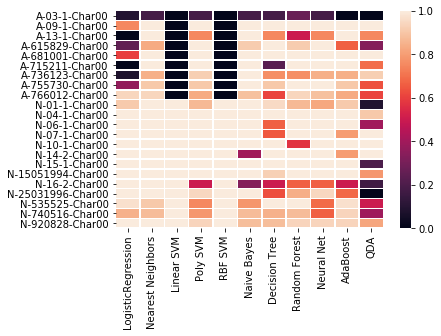

In [23]:
sns.heatmap(score,xticklabels=names,yticklabels=ex_names,linewidths=0.5)